# LAB 3 - NEURAL NETWORKS

## Implementing Linear Regression with TensorFlow

This part demonstrates how to implement a simple linear regression model using **TensorFlow** and **Keras**. The goal is to train a model that learns the relationship between an independent variable $X$ and a dependent variable
$y$, following a linear equation:

$$ y=2.5x+5+noise $$

We generate synthetic data with a linear pattern and some added noise, ensuring a more realistic dataset. The TensorFlow model consists of a single neuron (Dense layer with one unit), representing a simple linear function.

Key Steps in This Implementation:
* ✅ Generate synthetic data using NumPy,
* ✅ Define a simple linear regression model in TensorFlow,
* ✅ Compile the model with stochastic gradient descent (SGD) and mean squared error (MSE) loss,
* ✅ Train the model over 200 epochs,
* ✅ Extract and print the learned weight and bias,
* ✅ Visualize both the fitted regression line and the training loss curve.

This approach provides a hands-on understanding of supervised learning for regression tasks using deep learning frameworks. 🚀

https://dev.to/rodolfoferro/a-simple-linear-regression-with-tensorflow-20-1aap

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Weight: 2.56408953666687
Bias: 4.764482498168945


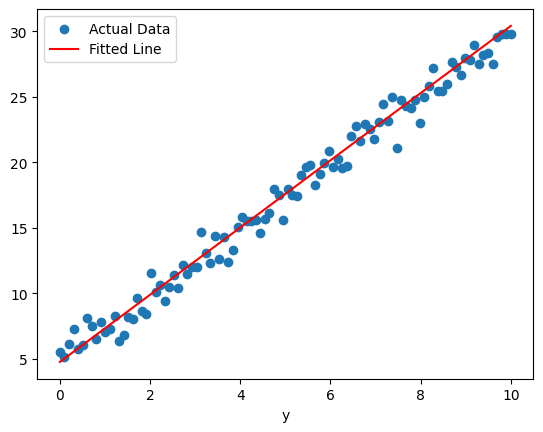

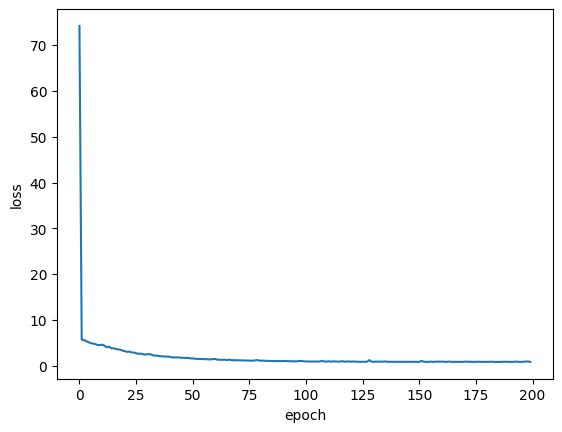

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2.5 * X + 5 + np.random.normal(0, 1, 100)  # y = 2.5x + 5 + noise

# Reshape X for TensorFlow
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Define a simple linear model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='linear')  # Single neuron
])

# Summary of the model
model.summary()

# Compile the model
model.compile(optimizer='sgd', loss='mse')

# Train the model (verbose=0 supresses the output epoch printing)
history = model.fit(X, y, epochs=200, verbose=0)

# Predict using the trained model
y_pred = model.predict(X)

# Get model weights
weights, bias = model.layers[0].get_weights()

# Print weights and bias
print(f"Weight: {weights[0][0]}")
print(f"Bias: {bias[0]}")

# Plot the results
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('x')
plt.xlabel('y')
plt.legend()
plt.show()

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## TensorFlow-Based NN Implementation

This code implements a simple **feedforward neural network** using **TensorFlow** and NumPy. The network consists of two dense layers and takes an input of two features. It performs **forward propagation** and makes a binary classification prediction.

This code:
* Defines a two-layer neural network using TensorFlow.
* Uses sigmoid activation in both layers.
* Takes 2 input features and processes them through 3 hidden neurons.
* Produces a single output neuron for binary classification.
* Implements manual forward propagation and decision-making based on output probability.
* Demonstrates an alternative way to define the model using `tf.keras.Sequential`.




In [ ]:
from inspect import EndOfBlock
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Input data
x = np.array([[200, 17]])
print("Shape of x:", x.shape)  # Expected: (1, 2)

# Define the first layer with input shape (This layer has 3 neurons)
layer_1 = tf.keras.layers.Dense(units=3, activation='sigmoid', input_shape=(2,))
a1 = layer_1(tf.convert_to_tensor(x, dtype=tf.float32))  # Convert NumPy array to Tensor
print("Output of layer 1 Tensor:", a1)  # Tensor printing
print("Output of layer 1:", a1.numpy())  # Convert Tensor to NumPy for printing
print("a1 Shape:", a1.numpy().shape)  # Convert to NumPy for printing

# Define the second layer (This layer has 1 neuron)
layer_2 = tf.keras.layers.Dense(units=1, activation='sigmoid')
a2 = layer_2(a1)  # Corrected to use layer_2
a2_val = a2.numpy().item()
print("Output of layer 2 Tensor:", a2)  # Tensor printing
print("Output of layer 2:", a2_val)  # Convert to NumPy for printing

if a2_val >= 0.5:
  y_hat = 1
else:
  y_hat = 0

print("Prediction:", y_hat)

## Alternative way

model1 = tf.keras.Sequential([layer_1, layer_2])
model2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=3, activation='sigmoid', input_shape=(2,)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')]
    )

Shape of x: (1, 2)
Output of layer 1 Tensor: tf.Tensor([[0.0000000e+00 2.2410045e-35 1.2244233e-13]], shape=(1, 3), dtype=float32)
Output of layer 1: [[0.0000000e+00 2.2410045e-35 1.2244233e-13]]
a1 Shape: (1, 3)
Output of layer 2 Tensor: tf.Tensor([[0.5]], shape=(1, 1), dtype=float32)
Output of layer 2: 0.5
Prediction: 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## NumPy-Based NN Implementation

This code implements a simple **feedforward neural network using NumPy**. Unlike TensorFlow or other deep learning frameworks, this implementation manually defines the forward propagation process using matrix operations and activation functions.

The neural network consists of:

* 2 input features (e.g., `x = [200, 17]`),
* 1 hidden layer with 3 neurons (fully connected),
* 1 output neuron for binary classification,
* Sigmoid activation function applied to both layers.

This approach helps understand the underlying mathematical operations in neural networks by explicitly computing dot products, adding biases, and applying activation functions.

**Computing Each Neuron's Activation:**

For a given layer $l$, each neuron $j$ computes its activation using the following formula:

$$ z_j^{[l]} = \sum_{i=1}^{n} w_{ij}^{[l]} a_i^{[l-1]} + b_j^{[l]} $$

where:
* $z_j^{[l]}$ is the **weighted sum** for neuron $j$ in layer $l$,
* $w_{ij}^{[l]}$ represents the **weight** connecting neuron $i$ in layer $l-1 $ to neuron $j$ in layer $l$,
* $a_i^{[l-1]} $ is the **activation** from the previous layer $l-1$,
* $b_j^{[l]}$ is the **bias** for neuron $j$ in layer $l$.

The output activation of each neuron is obtained by applying the **sigmoid activation function ($g(z)$)**:

$$ a_j^{[l]} = g(z_j^{[l]}) = \frac{1}{1 + e^{-z_j^{[l]}}} $$


**Example: Hidden Layer with 3 Neurons**

For **layer 1** with 3 neurons, the activations are computed as:

$$ z_1^{[1]} = w_{11}^{[1]} x_1 + w_{21}^{[1]} x_2 + b_1^{[1]}, \quad a_1^{[1]} = g(z_1^{[1]}) $$

$$ z_2^{[1]} = w_{12}^{[1]} x_1 + w_{22}^{[1]} x_2 + b_2^{[1]}, \quad a_2^{[1]} = g(z_2^{[1]}) $$

$$ z_3^{[1]} = w_{13}^{[1]} x_1 + w_{23}^{[1]} x_2 + b_3^{[1]}, \quad a_3^{[1]} = g(z_3^{[1]}) $$

$$
\mathbf{W}^{[1]} =
\begin{bmatrix}
w_{11}^{[1]}, w_{12}^{[1]}, w_{13}^{[1]} \\
w_{21}^{[1]}, w_{22}^{[1]}, w_{23}^{[1]}
\end{bmatrix}
$$

Thus, the activation vector for **layer 1** is:

$$
\mathbf{a}^{[1]} =
\begin{bmatrix}
a_1^{[1]},
a_2^{[1]},
a_3^{[1]}
\end{bmatrix}
=
\begin{bmatrix}
g(z_1^{[1]}),
g(z_2^{[1]}),
g(z_3^{[1]})
\end{bmatrix}
$$

For **layer 2**, which contains a single output neuron, the pre-activation value is computed as:

$$  z_1^{[2]} = w_{11}^{[2]} a_1^{[1]} + w_{21}^{[2]} a_2^{[1]} + w_{31}^{[2]} a_3^{[1]} + b_1^{[2]} $$

$$
\mathbf{W}^{[2]} =
\begin{bmatrix}
w_{11}^{[2]} \\
w_{21}^{[2]} \\
w_{31}^{[2]} \\
\end{bmatrix}
$$

Applying the sigmoid activation function:

$$  a_1^{[2]} = g(z_1^{[2]}) = \frac{1}{1 + e^{-z_1^{[2]}}} $$

Thus, the activation vector for layer 2 (output layer) is:

$$
\mathbf{a}^{[2]} =
\begin{bmatrix}
a_1^{[2]}
\end{bmatrix}
=
\begin{bmatrix}
g(z_1^{[2]})
\end{bmatrix}
$$

**Vectorized Form:**

In matrix notation, this can be written as:

$$ \mathbf{z}^{[l]} = \mathbf{W}^{[l]} \mathbf{a}^{[l-1]} + \mathbf{b}^{[l]} $$

$$ \mathbf{a}^{[l]} = g(\mathbf{z}^{[l]}) $$


where:
* $\mathbf{a}^{[l-1]}$ is the **input vector** from the previous layer,
* $\mathbf{W}^{[l]}$ is the **weight matrix** $(n \times m)$, where $m$ is the number of neurons in the current layer,
* $\mathbf{b}^{[l]}$ is the **bias vector**,
* $\mathbf{z}^{[l]}$ is the **pre-activation output**,
* $\mathbf{a}^{[l]}$ is the **final activated output**.

This formulation generalizes the computation for any layer $l$ in a **fully connected neural network**, ensuring scalability to deeper architectures.


In [ ]:
import numpy as np

# Sigmoid activation function
def g(z):
    return 1 / (1 + np.exp(-z))

# Custom Dense Layer Function
def my_dense(a_in, W, b):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example
      W    (ndarray (n, j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : Bias vector, j units
    Returns
      a_out (ndarray (j, ))  : j units
    """
    units = W.shape[1] # number of neurons
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:, j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
    return a_out

# ---- Forward Propagation Using my_dense ----

# Input data (single sample with 2 features)
x = np.array([200, 17])  # Shape: (1,2)

# Initialize weights and biases for Layer 1 (2 input → 3 hidden units)
W1 = np.random.randn(2, 3)  # Shape: (2,3)
b1 = np.random.randn(3)     # Shape: (1,3)

# Compute activations for hidden layer 1
a1 = my_dense(x, W1, b1)
print("Output of layer 1:", a1)

# Initialize weights and biases for Layer 2 (3 hidden units → 1 output unit)
W2 = np.random.randn(3, 1)  # Shape: (3,1)
b2 = np.random.randn(1)     # Shape: (1,1)

# Compute activations for output layer
a2 = my_dense(a1, W2, b2)
print("Output of layer 2:", a2)

# Prediction (Binary classification)
y_hat = 1 if a2 >= 0.5 else 0
print("Prediction:", y_hat)


Output of layer 1: [1.00000000e+00 1.00000000e+00 1.10453455e-31]
Output of layer 2: [0.94658327]
Prediction: 1


This part demonstrates the implementation of a simple feedforward neural network using **NumPy**, without relying on deep learning libraries like **TensorFlow or PyTorch**. The goal is to manually compute the forward propagation process using **efficient vectorized operations**.

Instead of using explicit loops, we use NumPy's `matmul` function for matrix multiplications, making the implementation more efficient. This approach provides a clear understanding of how neural networks operate at the mathematical level, ensuring an optimized and scalable forward propagation process.

In [ ]:
import numpy as np

# Sigmoid activation function
def g(z):
    return 1 / (1 + np.exp(-z))

# Vectorized Dense Layer Function using np.matmul
def my_dense(a_in, W, b):
    """
    Computes dense layer using vectorized operations
    Args:
      a_in (ndarray (n, )) : Input data, 1 example
      W    (ndarray (n, j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : Bias vector, j units
    Returns:
      a_out (ndarray (j, )) : Output activations, j units
    """
    z = np.matmul(a_in, W) + b  # Matrix multiplication + bias addition

    return g(z)  # Apply activation function

# ---- Forward Propagation Using Vectorized my_dense ----

# Input data (single sample with 2 features)
x = np.array([200, 17])  # Shape: (1,2)

# Initialize weights and biases for Layer 1 (2 input → 3 hidden units)
W1 = np.random.randn(2, 3)  # Shape: (2,3)
b1 = np.random.randn(3)     # Shape: (3,)

# Compute activations for hidden layer 1
a1 = my_dense(x, W1, b1)
print("Output of layer 1:", a1)

# Initialize weights and biases for Layer 2 (3 hidden units → 1 output unit)
W2 = np.random.randn(3, 1)  # Shape: (3,1)
b2 = np.random.randn(1)     # Shape: (1,)

# Compute activations for output layer
a2 = my_dense(a1, W2, b2)
print("Output of layer 2:", a2)

# Prediction (Binary classification)
y_hat = 1 if a2 >= 0.5 else 0
print("Prediction:", y_hat)


Output of layer 1: [2.24695532e-077 1.04561669e-178 1.00000000e+000]
Output of layer 2: [0.12478083]
Prediction: 0


## Softmax Implementation in a Multi-Class NN using NumPy

This **NumPy-based** neural network implements a simple multi-class classification model with one hidden layer using **ReLU** activation and an output layer with **softmax** activation. The model is trained using gradient descent with categorical cross-entropy loss for 500 epochs on a small dataset of five training samples. The training loop performs forward propagation, where inputs are passed through a hidden layer (applying ReLU) and then through an output layer (applying softmax to obtain class probabilities). The loss is computed using the true class labels, and backpropagation updates the weights and biases using gradient descent. After training, the model is tested on a single input `[1.5, -2.0]`, and the predicted class, along with raw logits and softmax probabilities, is displayed. The code ensures numerical stability in softmax calculations and prints loss updates every 50 epochs to track training progress.

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# ---- Activation Functions ----
def relu(z):
    """Applies ReLU activation function."""
    return np.maximum(0, z)

def softmax(z):
    """Applies the softmax function for multi-class classification."""
    exp_z = np.exp(z - np.max(z))  # For numerical stability
    return exp_z / np.sum(exp_z)

# ---- Forward Propagation Function ----
def forward_propagation(X, W1, b1, W2, b2):
    """Computes forward propagation through the network."""
    z1 = np.dot(X, W1) + b1  # Hidden layer pre-activation
    a1 = relu(z1)  # Hidden layer activation
    z2 = np.dot(a1, W2) + b2  # Output layer pre-activation (logits)
    y_pred = softmax(z2)  # Output layer activation (softmax)
    return z1, a1, z2, y_pred  # Returns all intermediate values

# ---- Define Model Parameters ----
input_size = 2  # Number of features
hidden_size = 3  # Number of neurons in hidden layer
output_size = 3  # Number of classes

# Manually defined weights and biases (for testing forward propagation)
W1 = np.array([[0.2, -0.5, 0.1], [-0.3, 0.8, -0.2]])  # Shape: (2,3)
b1 = np.array([0.1, -0.2, 0.05])  # Shape: (3,)

W2 = np.array([[0.4, -0.7, 0.2], [-0.1, 0.3, 0.5], [0.2, -0.3, 0.7]])  # Shape: (3,3)
b2 = np.array([0.05, -0.1, 0.2])  # Shape: (3,)

# ---- Test Sample ----
X_test = np.array([1.5, -2.0])  # Single test sample

# ---- Perform Forward Propagation ----
z1_test, a1_test, z2_test, y_pred_test = forward_propagation(X_test, W1, b1, W2, b2)

# ---- Print Results ----
print("Hidden Layer Pre-Activation (z1):", z1_test)
print("Hidden Layer Activation (a1):", a1_test)
print("Output Layer Pre-Activation (Logits, z2):", z2_test)
print("Softmax Probabilities:", y_pred_test)
print("Predicted Class:", np.argmax(y_pred_test))


Hidden Layer Pre-Activation (z1): [ 1.   -2.55  0.6 ]
Hidden Layer Activation (a1): [1.  0.  0.6]
Output Layer Pre-Activation (Logits, z2): [ 0.57 -0.98  0.82]
Softmax Probabilities: [0.40059715 0.08502593 0.51437692]
Predicted Class: 2


## Softmax Implementation in a Multi-Class NN using TensorFlow

This implementation uses **TensorFlow** to build a multi-class classification neural network with a softmax activation function.

The model consists of two dense layers: the first layer has 3 neurons and applies softmax activation, and the second (output) layer also has 3 neurons with softmax, ensuring that the final outputs represent class probabilities. The softmax function converts raw scores into probabilities that sum to 1, making it ideal for multi-class classification.

The model is compiled using the Adam optimizer and `SparseCategoricalCrossentropy` loss, which is suitable when the target labels are integer-encoded rather than one-hot encoded. After defining the model, we perform a forward pass with a sample input (`x = [1.5, -2.0]`), and the predicted class is determined using `argmax()` on the softmax outputs. This TensorFlow-based approach simplifies implementation by automating weight initialization, forward propagation, and softmax computation, making it more scalable and efficient compared to a manual NumPy-based approach.

In [ ]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define input shape
input_shape = (2,)  # 2 features

# Define the model with a linear output layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, activation="relu", input_shape=input_shape),  # Hidden layer (3 neurons, ReLU)
    tf.keras.layers.Dense(units=3, activation="linear")  # Output layer (3 neurons, Linear)
])

# Compile the model with optimizer and loss function
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Since output is logits
              metrics=["accuracy"])

# ---- Training Data ----
# Example dataset (5 samples, each with 2 features)
X_train = np.array([
    [1.5, -2.0],
    [0.3, 2.1],
    [-1.0, -0.5],
    [2.2, 1.0],
    [-1.5, 1.5]
])  # Shape: (5,2)

# Corresponding class labels (0, 1, or 2)
y_train = np.array([1, 2, 0, 1, 2])  # Shape: (5,)

# ---- Train the Model ----
model.fit(X_train, y_train, epochs=200, verbose=0)  # Train for 10 epochs

# ---- Evaluate the Model ----

# Define a test sample
X_test = np.array([[1.5, -2.0]])  # Single test sample
y_test = np.array([1])  # True class label for evaluation

# Compute loss and accuracy using `evaluate()`
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Get raw logits (unprocessed outputs)
logits = model.predict(X_test)

# Apply softmax explicitly
y_pred = tf.nn.softmax(logits).numpy()

# Print results
print("\nTest Sample Raw Logits:", logits)
print("Test Sample Softmax Probabilities:", y_pred)
print("Predicted Class:", np.argmax(y_pred))
print("Computed Loss:", loss)
print("Computed Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Test Sample Raw Logits: [[-0.1315276  1.0684325 -0.8355726]]
Test Sample Softmax Probabilities: [[0.20770311 0.689571   0.10272594]]
Predicted Class: 1
Computed Loss: 0.37168559432029724
Computed Accuracy: 1.0


## Large Example

### TensorFlow Implementation

This **TensorFlow-based** neural network performs multi-class classification on a 4-class dataset generated using `make_blobs()`. The model has a hidden layer (25 ReLU neurons) and an output layer (4 linear neurons for logits). It is trained for 200 epochs using the Adam optimizer and Sparse Categorical Crossentropy loss. After training, it evaluates a test sample, computes softmax probabilities, and predicts the class. Finally, it visualizes decision boundaries, showing classification regions and marking the test sample with a red "X". 🚀

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Test Sample Raw Logits: [[-4.741786   2.0207946 -4.092973   2.2234457]]
Test Sample Softmax Probabilities: [[5.189561e-04 4.488303e-01 9.929026e-04 5.496578e-01]]
Predicted Class: 3
Computed Loss: 0.5984593033790588
Computed Accuracy: 1.0
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


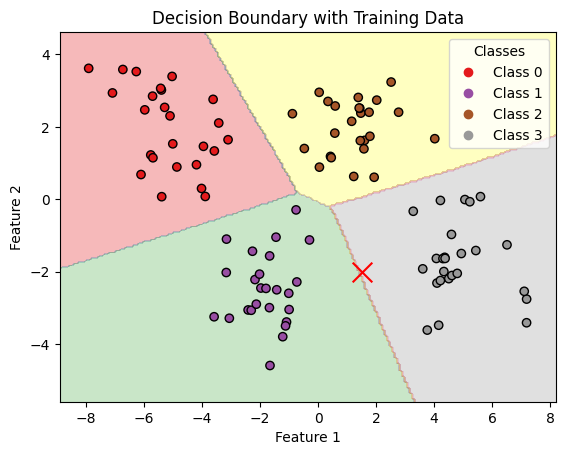

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# ---- Training Data ----
# Create a dataset with 4 classes
classes = 4
m = 100  # Number of samples
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]  # Cluster centers
std = 1.0  # Standard deviation
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)

# Define input shape
input_shape = (2,)  # 2 features

# ---- Define the Model ----
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation="relu", input_shape=input_shape),  # Hidden layer (5 neurons, ReLU)
    tf.keras.layers.Dense(units=4, activation="linear")  # Output layer (4 neurons for 4 classes, Linear)
])

# Compile the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Output is logits
              metrics=["accuracy"])

# ---- Train the Model ----
model.fit(X_train, y_train, epochs=200, verbose=0)  # Train for 200 epochs

# ---- Evaluate the Model ----
X_test = np.array([[1.5, -2.0]])  # Single test sample
y_test = np.array([3])  # True class label

# Compute loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Get raw logits and apply softmax
logits = model.predict(X_test)
y_pred = tf.nn.softmax(logits).numpy()

# Print results
print("\nTest Sample Raw Logits:", logits)
print("Test Sample Softmax Probabilities:", y_pred)
print("Predicted Class:", np.argmax(y_pred))
print("Computed Loss:", loss)
print("Computed Accuracy:", accuracy)

# ---- Visualizing Decision Boundaries ----
def plot_decision_boundary(model, X, y, class_labels):
    """Plots the decision boundary for the trained model with class labels."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Make predictions over the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    logits = model.predict(grid_points)
    preds = np.argmax(logits, axis=1)
    preds = preds.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Set1)

    # Scatter plot for training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)

    # Scatter plot for the test sample
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', marker='x', s=200, label="Test Point")

    # Add class labels to the legend
    handles, _ = scatter.legend_elements()
    plt.legend(handles, class_labels + ["Test Point"], title="Classes")

    plt.title("Decision Boundary with Training Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Class labels for legend
class_labels = [f"Class {i}" for i in range(classes)]

# Plot decision boundary
plot_decision_boundary(model, X_train, y_train, class_labels)


### NumPy Implementation

This **NumPy-based** neural network implements a multi-class classifier using a single hidden layer and softmax activation for output prediction. The model is trained on a 4-class dataset generated using `make_blobs()`, with manual forward propagation and backpropagation to update weights using gradient descent. The ReLU activation function is applied in the hidden layer to introduce non-linearity, while softmax converts logits into class probabilities in the output layer. The model trains for 1000 epochs, reducing categorical cross-entropy loss over time. After training, the model predicts the class of a test sample, computes its loss, and visualizes decision boundaries, showing how different regions are classified. 🚀

Epoch 50/1000, Loss: 1.3820
Epoch 100/1000, Loss: 1.3730
Epoch 150/1000, Loss: 1.3492
Epoch 200/1000, Loss: 1.2869
Epoch 250/1000, Loss: 1.1532
Epoch 300/1000, Loss: 0.9747
Epoch 350/1000, Loss: 0.8406
Epoch 400/1000, Loss: 0.7504
Epoch 450/1000, Loss: 0.6713
Epoch 500/1000, Loss: 0.5915
Epoch 550/1000, Loss: 0.5147
Epoch 600/1000, Loss: 0.4477
Epoch 650/1000, Loss: 0.3912
Epoch 700/1000, Loss: 0.3420
Epoch 750/1000, Loss: 0.2974
Epoch 800/1000, Loss: 0.2564
Epoch 850/1000, Loss: 0.2196
Epoch 900/1000, Loss: 0.1876
Epoch 950/1000, Loss: 0.1609
Epoch 1000/1000, Loss: 0.1392

Test Sample Raw Logits: [[-1.77702118  0.57292554 -0.20785357  1.36375742]]
Test Sample Softmax Probabilities: [[0.02537458 0.26605273 0.12186519 0.5867075 ]]
Predicted Class: 3
Computed Loss: 0.5332288742267605


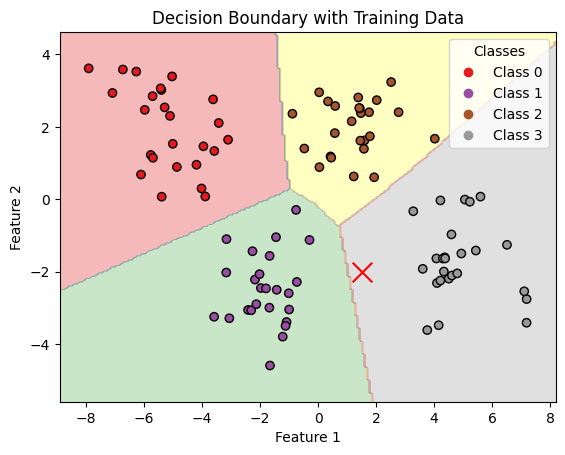

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# ---- Activation Functions ----
def relu(z):
    """Applies ReLU activation function."""
    return np.maximum(0, z)

def softmax(z):
    """Applies the softmax function for multi-class classification."""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# ---- Loss Function ----
def categorical_crossentropy(y_true, y_pred):
    """Computes categorical cross-entropy loss."""
    m = y_true.shape[0]
    return -np.sum(np.log(y_pred[np.arange(m), y_true])) / m

# ---- Forward Propagation ----
def forward_propagation(X, W1, b1, W2, b2):
    """Computes forward propagation through the network."""
    z1 = np.dot(X, W1) + b1  # Hidden layer pre-activation
    a1 = relu(z1)  # Hidden layer activation
    z2 = np.dot(a1, W2) + b2  # Output layer pre-activation (logits)
    y_pred = softmax(z2)  # Output layer activation (softmax)
    return z1, a1, z2, y_pred  # Returns all intermediate values

# ---- Initialize Model Parameters ----
input_size = 2  # Number of features
hidden_size = 25  # Hidden layer size
output_size = 4  # Number of classes

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Shape: (2,25)
b1 = np.zeros((1, hidden_size))  # Shape: (1,25)

W2 = np.random.randn(hidden_size, output_size) * 0.01  # Shape: (25,4)
b2 = np.zeros((1, output_size))  # Shape: (1,4)

# ---- Training Data ----
# Create a dataset with 4 classes
classes = 4
m = 100  # Number of samples
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]  # Cluster centers
std = 1.0  # Standard deviation
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)

# ---- Training Loop ----
epochs = 1000
learning_rate = 0.01

for epoch in range(epochs):
    # Forward propagation
    z1_train, a1_train, z2_train, y_pred_train = forward_propagation(X_train, W1, b1, W2, b2)

    # Compute loss
    loss = categorical_crossentropy(y_train, y_pred_train)

    # Backpropagation (Gradient Descent)
    m = y_train.shape[0]
    dz2 = y_pred_train
    dz2[np.arange(m), y_train] -= 1
    dz2 /= m

    dW2 = np.dot(a1_train.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, W2.T) * (z1_train > 0)  # ReLU derivative
    dW1 = np.dot(X_train.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

# ---- Evaluate Model ----
X_test = np.array([[1.5, -2.0]])  # Single test sample
y_test = np.array([3])  # True class label

# Perform forward propagation for test
_, _, z2_test, y_pred_test = forward_propagation(X_test, W1, b1, W2, b2)

# Compute loss
test_loss = categorical_crossentropy(y_test, y_pred_test)

# Print results
print("\nTest Sample Raw Logits:", z2_test)
print("Test Sample Softmax Probabilities:", y_pred_test)
print("Predicted Class:", np.argmax(y_pred_test))
print("Computed Loss:", test_loss)

# ---- Visualizing Decision Boundaries ----
def plot_decision_boundary(W1, b1, W2, b2, X, y, class_labels):
    """Plots the decision boundary for the trained model with class labels."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Make predictions over the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    _, _, z2_grid, y_pred_grid = forward_propagation(grid_points, W1, b1, W2, b2)
    preds = np.argmax(y_pred_grid, axis=1)
    preds = preds.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Set1)

    # Scatter plot for training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)

    # Scatter plot for the test sample
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', marker='x', s=200, label="Test Point")

    # Add class labels to the legend
    handles, _ = scatter.legend_elements()
    plt.legend(handles, class_labels + ["Test Point"], title="Classes")

    plt.title("Decision Boundary with Training Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Class labels for legend
class_labels = [f"Class {i}" for i in range(classes)]

# Plot decision boundary
plot_decision_boundary(W1, b1, W2, b2, X_train, y_train, class_labels)


## Image classification

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
max(x)= 255, min(x)= 0
max(y)= 9, min(y)= 0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0895
Test Accuracy: 0.9757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


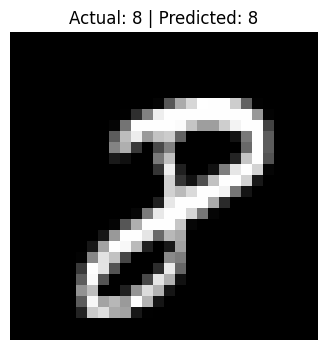

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)

print(f"max(x)= {np.max(X_train)}, min(x)= {np.min(X_train)}")
print(f"max(y)= {np.max(y_train)}, min(y)= {np.min(y_train)}")

# Normalize the images to [0, 1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array
    Dense(128, activation="relu"),  # Hidden layer with 128 neurons
    Dense(64, activation="relu"),   # Hidden layer with 64 neurons
    Dense(10, activation="softmax") # Output layer with 10 neurons (for digits 0-9)
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Predict on a random test image
idx = np.random.randint(0, X_test.shape[0])
sample_image = X_test[idx]
sample_label = y_test[idx]

# Show the image
plt.imshow(sample_image, cmap="gray")
plt.title(f"Actual: {sample_label} | Predicted: {np.argmax(model.predict(sample_image.reshape(1, 28, 28)))}")
plt.axis("off")
plt.show()


## Backpropagation (NumPy)

Backpropagation efficiently computes gradients and updates weights in a neural network using the chain rule. The key steps are:

**Forward Propagation:** Compute the activations and outputs.
    \begin{align*}
        Z_1 &= W_1 X + b_1 \\
        A_1 &= \text{ReLU}(Z_1) \\
        Z_2 &= W_2 A_1 + b_2 \\
        A_2 &= \text{Softmax}(Z_2)
    \end{align*}

**Compute Loss:** Use the categorical cross-entropy loss function:

$$ J = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{d_y} y_{ij} \log A_{ij} $$

**Compute Gradients Using Chain Rule:**
    \begin{align*}
        dZ_2 &= A_2 - Y \\
        dW_2 &= \frac{1}{m} dZ_2 A_1^T \\
        db_2 &= \frac{1}{m} \sum dZ_2 \\
        dA_1 &= W_2^T dZ_2 \\
        dZ_1 &= dA_1 \cdot \text{ReLU}'(Z_1) \\
        dW_1 &= \frac{1}{m} dZ_1 X^T \\
        db_1 &= \frac{1}{m} \sum dZ_1
    \end{align*}

**Update Weights Using Gradient Descent:**
    \begin{align*}
        W_1 &= W_1 - \alpha dW_1 \\
        b_1 &= b_1 - \alpha db_1 \\
        W_2 &= W_2 - \alpha dW_2 \\
        b_2 &= b_2 - \alpha db_2
    \end{align*}


Backpropagation efficiently optimizes neural networks by minimizing the loss function through iterative weight updates.

Epoch 0/10000, Loss: 1.1273, Accuracy: 25.60%
Epoch 1000/10000, Loss: 0.0874, Accuracy: 96.60%
Epoch 2000/10000, Loss: 0.0854, Accuracy: 96.60%
Epoch 3000/10000, Loss: 0.0848, Accuracy: 96.60%
Epoch 4000/10000, Loss: 0.0844, Accuracy: 96.60%
Epoch 5000/10000, Loss: 0.0839, Accuracy: 96.60%
Epoch 6000/10000, Loss: 0.0837, Accuracy: 96.60%
Epoch 7000/10000, Loss: 0.0835, Accuracy: 96.60%
Epoch 8000/10000, Loss: 0.0834, Accuracy: 96.60%
Epoch 9000/10000, Loss: 0.0833, Accuracy: 96.60%

Final Predictions (first 10 samples):
 [1 1 0 0 1 1 1 1 1 1]


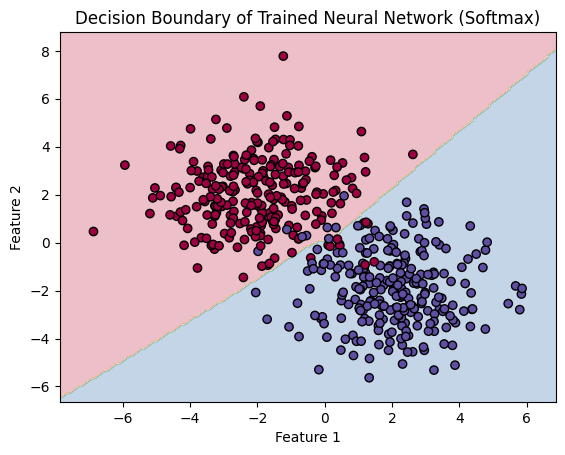

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# ---- Training Data ----
# Generate a dataset with 500 samples, 2 features, and 2 classes (binary classification)
X, y = make_blobs(n_samples=500, centers=[[-2, 2], [2, -2]], cluster_std=1.5, random_state=42)
y = y.reshape(-1, 1)  # Ensure y is a column vector

# n_samples=500	Creates 500 data points.
# centers=[[-2, 2], [2, -2]]	Defines two cluster centers (Class 0 at [-2,2], Class 1 at [2,-2]).
# cluster_std=1.5	Controls spread of points (larger value = more spread).
# random_state=42	Ensures reproducibility (same dataset each run).

# Convert labels to one-hot encoding for softmax
num_classes = 3
y_one_hot = np.eye(num_classes)[y.flatten()]

# ---- Neural Network Structure ----
input_size = 2   # 2 input features
hidden_size = 10  # Increased hidden neurons
output_size = num_classes  # 3 output neurons for 3 classes

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.1  # Shape: (2,10)
b1 = np.zeros((1, hidden_size))                      # Shape: (1,10)
W2 = np.random.randn(hidden_size, output_size) * 0.1  # Shape: (10,3)
b2 = np.zeros((1, output_size))                       # Shape: (1,3)

# Learning rate
alpha = 0.1

# ---- Activation Functions ----
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)  # Gradient is 1 for z > 0, otherwise 0

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# ---- Forward Propagation ----
def forward_propagation(X):
    global W1, b1, W2, b2  # Use global weights

    # Compute activations for hidden layer (ReLU)
    Z1 = np.dot(X, W1) + b1  # Linear transformation
    A1 = relu(Z1)            # Apply ReLU activation

    # Compute activations for output layer (Softmax)
    Z2 = np.dot(A1, W2) + b2  # Linear transformation
    A2 = softmax(Z2)          # Apply Softmax activation

    return Z1, A1, Z2, A2  # Return all values needed for backpropagation

# ---- Compute Loss ----
def compute_loss(y, A2):
    m = y.shape[0]
    return -np.sum(y * np.log(A2 + 1e-9)) / m  # Adding 1e-9 for numerical stability

# ---- Compute Accuracy ----
def compute_accuracy(y_true, A2):
    y_pred = np.argmax(A2, axis=1)  # Get predicted class
    y_true = np.argmax(y_true, axis=1)  # Get true class
    return np.mean(y_pred == y_true) * 100  # Percentage of correct predictions

# ---- Backpropagation ----
def backpropagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2  # Use global weights

    m = y.shape[0]  # Number of training examples

    # Compute gradients for output layer
    dZ2 = A2 - y  # Derivative of loss w.r.t. Z2 (Softmax output - True labels)
    dW2 = np.dot(A1.T, dZ2) / m  # Derivative of loss w.r.t. W2
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # Derivative of loss w.r.t. b2

    # Compute gradients for hidden layer
    dA1 = np.dot(dZ2, W2.T)  # Backpropagate through W2
    dZ1 = dA1 * relu_derivative(Z1)  # Apply ReLU derivative
    dW1 = np.dot(X.T, dZ1) / m  # Derivative of loss w.r.t. W1
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m  # Derivative of loss w.r.t. b1

    # Update weights and biases
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

# ---- Train the Neural Network ----
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    Z1, A1, Z2, A2 = forward_propagation(X)

    # Compute loss and accuracy
    loss = compute_loss(y_one_hot, A2)
    accuracy = compute_accuracy(y_one_hot, A2)

    # Backward pass (update weights)
    backpropagation(X, y_one_hot, Z1, A1, Z2, A2)

    # Print loss and accuracy every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

# ---- Make Predictions ----
def predict(X):
    _, _, _, A2 = forward_propagation(X)
    return np.argmax(A2, axis=1)  # Select class with highest probability

# Test predictions
y_pred = predict(X)
print("\nFinal Predictions (first 10 samples):\n", y_pred[:10])

# ---- Visualizing Decision Boundary ----
def plot_decision_boundary(W1, b1, W2, b2, X, y):
    """Plots the decision boundary of the trained neural network."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Make predictions over the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    preds = predict(grid_points)
    preds = preds.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Spectral)

    # Scatter plot for training points
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap=plt.cm.Spectral)

    plt.title("Decision Boundary of Trained Neural Network (Softmax)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision boundary
plot_decision_boundary(W1, b1, W2, b2, X, y)



## NN Architectures for Nonlinear Regression: Model Complexity vs. Performance

This Python script explores Neural Network architectures for nonlinear regression, comparing their performance based on **Mean Squared Error (MSE)**. The dataset is generated using a cubic function with noise, ensuring a complex nonlinear trend. The input features are standardized using StandardScaler, and the data is split into 80% training and 20% testing. Four different neural network architectures are defined, ranging from 1 to 4 hidden layers with varying neuron counts. Each architecture is trained using **ReLU activation** in hidden layers and **Adam optimizer** with MSE loss. After training, MSE values for training and test sets are computed and plotted against model complexity to analyze underfitting, optimal fit, and overfitting. The best model (with the lowest test MSE) is selected, retrained for 500 epochs, and used to make predictions over a range of input values. Finally, the best-fit curve is plotted, showing how well the selected neural network captures the underlying nonlinear pattern. This approach demonstrates how deep learning can approximate complex functions, and how model selection plays a key role in achieving good generalization.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
10
10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
20
15
10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
30
20
15
10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


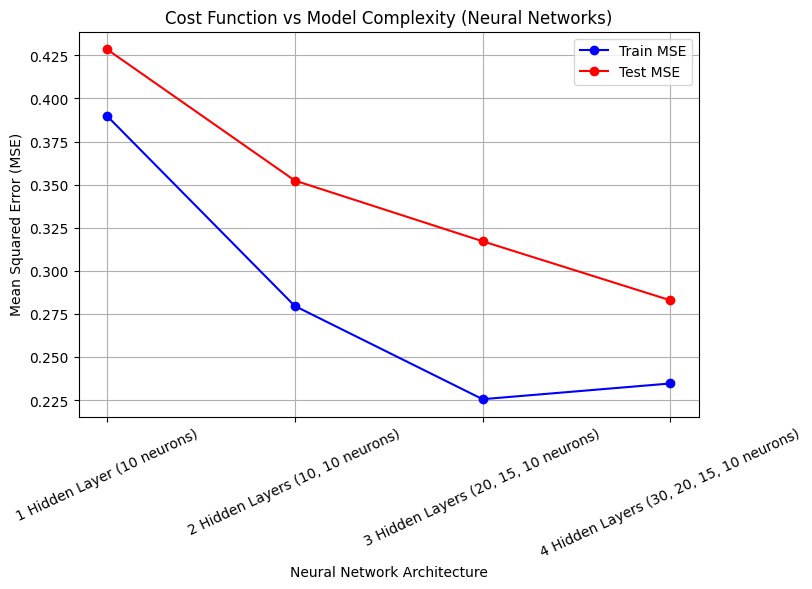

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


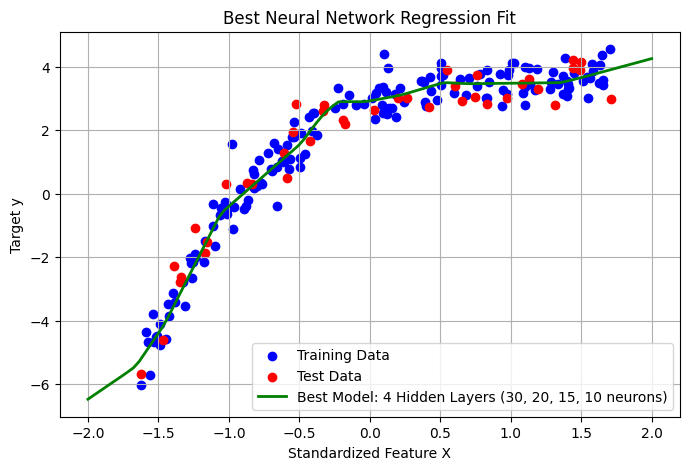

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ---- Generate Nonlinear Data ----
np.random.seed(42)
X = 2 * np.random.rand(200, 1) - 1  # 200 samples in range [-1,1]
y = 3 + 2*X - 4*X**2 + 3*X**3 + np.random.randn(200, 1) * 0.5  # Nonlinear cubic function with noise

# ---- Standardize Features ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize X (mean=0, variance=1)

# ---- Split Data (80% Train - 20% Test) ----
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---- Define Different NN Architectures ----
architectures = [
    {"name": "1 Hidden Layer (10 neurons)", "layers": [10]},
    {"name": "2 Hidden Layers (10, 10 neurons)", "layers": [10, 10]},
    {"name": "3 Hidden Layers (20, 15, 10 neurons)", "layers": [20, 15, 10]},
    {"name": "4 Hidden Layers (30, 20, 15, 10 neurons)", "layers": [30, 20, 15, 10]}
]

train_errors = []
test_errors = []

# ---- Loop Through Architectures and Compute MSE ----
for arch in architectures:
    # Build the model
    model = keras.Sequential()
    model.add(keras.layers.Dense(arch["layers"][0], activation="relu", input_shape=(1,)))  # First Layer

    # Add hidden layers dynamically
    for units in arch["layers"][1:]:
        model.add(keras.layers.Dense(units, activation="relu"))

    # Output Layer
    model.add(keras.layers.Dense(1, activation="linear"))  # Regression output (no activation)

    # Compile the model
    model.compile(optimizer="adam", loss="mse")

    # Train the model
    history = model.fit(X_train, y_train, epochs=300, verbose=0, batch_size=10, validation_data=(X_test, y_test))

    # Compute Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))

    # Store errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# ---- Plot Cost Function (MSE) vs Model Complexity ----
model_names = [arch["name"] for arch in architectures]

plt.figure(figsize=(8, 5))
plt.plot(model_names, train_errors, "bo-", label="Train MSE")
plt.plot(model_names, test_errors, "ro-", label="Test MSE")
plt.xlabel("Neural Network Architecture")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cost Function vs Model Complexity (Neural Networks)")
plt.legend()
plt.xticks(rotation=25)
plt.grid()
plt.show()

# ---- Visualize the Best Neural Network Fit ----
best_model_index = np.argmin(test_errors)  # Find the best model
best_arch = architectures[best_model_index]

# Build and Train the Best Model
best_model = keras.Sequential()
best_model.add(keras.layers.Dense(best_arch["layers"][0], activation="relu", input_shape=(1,)))
for units in best_arch["layers"][1:]:
    best_model.add(keras.layers.Dense(units, activation="relu"))
best_model.add(keras.layers.Dense(1, activation="linear"))  # Output Layer

best_model.compile(optimizer="adam", loss="mse")
best_model.fit(X_train, y_train, epochs=500, verbose=0, batch_size=10)

# Generate predictions
X_range = np.linspace(-2, 2, 100).reshape(-1, 1)  # Generate standardized X values for smooth curve
y_range_pred = best_model.predict(X_range)

# Plot the best NN fit
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='red', label="Test Data")
plt.plot(X_range, y_range_pred, color='green', linewidth=2, label=f"Best Model: {best_arch['name']}")
plt.xlabel("Standardized Feature X")
plt.ylabel("Target y")
plt.title(f"Best Neural Network Regression Fit")
plt.legend()
plt.grid()
plt.show()


In [54]:
architectures = [
    {"name": "1 Hidden Layer (10 neurons)", "layers": [10]},
    {"name": "2 Hidden Layers (10, 10 neurons)", "layers": [10, 10]},
    {"name": "3 Hidden Layers (20, 15, 10 neurons)", "layers": [20, 15, 10]},
    {"name": "4 Hidden Layers (30, 20, 15, 10 neurons)", "layers": [30, 20, 15, 10]}
]

print(architectures[0]["layers"])  # Output: [10]
for arch in architectures:
    print(f"{arch['name']}: {arch['layers']}")
    print(arch)

print(architectures[2]["layers"][0:2])

[10]
1 Hidden Layer (10 neurons): [10]
{'name': '1 Hidden Layer (10 neurons)', 'layers': [10]}
2 Hidden Layers (10, 10 neurons): [10, 10]
{'name': '2 Hidden Layers (10, 10 neurons)', 'layers': [10, 10]}
3 Hidden Layers (20, 15, 10 neurons): [20, 15, 10]
{'name': '3 Hidden Layers (20, 15, 10 neurons)', 'layers': [20, 15, 10]}
4 Hidden Layers (30, 20, 15, 10 neurons): [30, 20, 15, 10]
{'name': '4 Hidden Layers (30, 20, 15, 10 neurons)', 'layers': [30, 20, 15, 10]}
[20, 15]
